In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns # 数据可视化的包
import pandas as pd
import numpy as np

### 数据加载

In [79]:
digits = load_digits()

In [80]:
data = digits.data
images = digits.images
target = digits.target

### 数据探索

In [81]:
print(data.shape, type(data))
print(images.shape, type(data))
print(target.shape, type(data))

(1797, 64) <class 'numpy.ndarray'>
(1797, 8, 8) <class 'numpy.ndarray'>
(1797,) <class 'numpy.ndarray'>


data:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
image:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
图像对应的数字是: 0


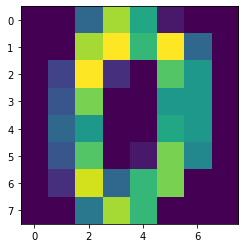

In [82]:
print('data:\n', data[0])
print('image:\n', images[0])
print('图像对应的数字是:', target[0])
plt.imshow(images[0])
plt.show()

### 划分数据集

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=43)

### Build a Preliminary Classfication Tree

In [84]:
clf_dt = DecisionTreeClassifier(random_state=43)
clf_dt.fit(X_train, y_train)

y_pred = clf_dt.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred):3f}')

accuracy: 0.855556


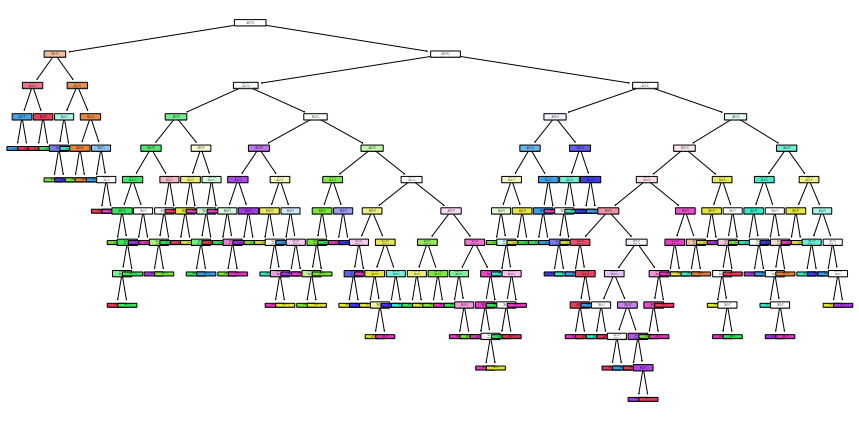

In [85]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True,
          rounded=True)
plt.show()

/home/gumiano/miniconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


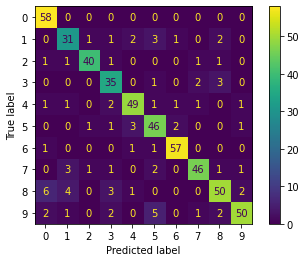

In [86]:
plot_confusion_matrix(clf_dt, X_test, y_test)

### Cost Complexity Pruning

In [87]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

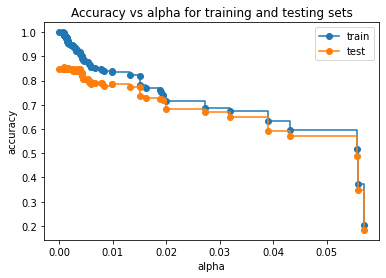

In [88]:
train_scores = [clf_dt.score(X_train ,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

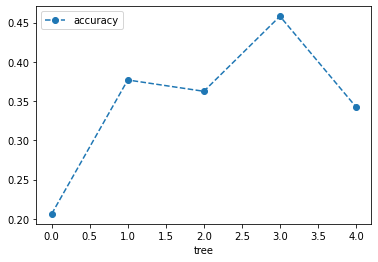

In [93]:
clt_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)

# NOTE: We use 5-fold because we don't have tons of data...
scores = cross_val_score(clf_dt, X_train, y_train) # 默认是3~5-fold
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')
plt.show()

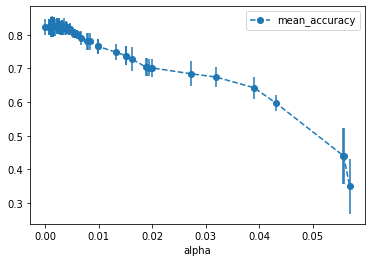

In [90]:
# create an array to store the results of each fold during cros validation
alpha_loop_values = []

# For each candidate value for alpha, we will run 5-fold cross validation 
# Then we will store the mean and standard deviation of the scores for each all 
# to cross_val_score in alpha_loop_values
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')
plt.show()

In [68]:
alpha_results[(alpha_results['alpha'] > 0.0015)
              &
              (alpha_results['alpha'] < 0.002)]

,alpha,mean_accuracy,std
37,0.001512,0.824948,0.028346
38,0.001525,0.824948,0.028346
39,0.001539,0.824948,0.028346
40,0.001541,0.824948,0.028346
41,0.001552,0.824948,0.028346
42,0.001554,0.824948,0.028346
43,0.001563,0.824948,0.028346
44,0.001566,0.824948,0.028346
45,0.001577,0.824948,0.028346
46,0.001591,0.824948,0.028121


In [71]:
ideal_alpha = alpha_results[(alpha_results['alpha'] > 0.0016)
              &
              (alpha_results['alpha'] < 0.002)]['alpha']
ideal_alpha

48    0.001875
Name: alpha, dtype: float64

In [72]:
ideal_alpha = float(ideal_alpha)
ideal_alpha # 得到了在这个训练集上拟合效果和泛化能力最好的alpha

0.0018752130923968629

In [73]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

/home/gumiano/miniconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


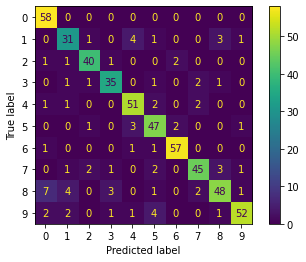

In [74]:
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test)

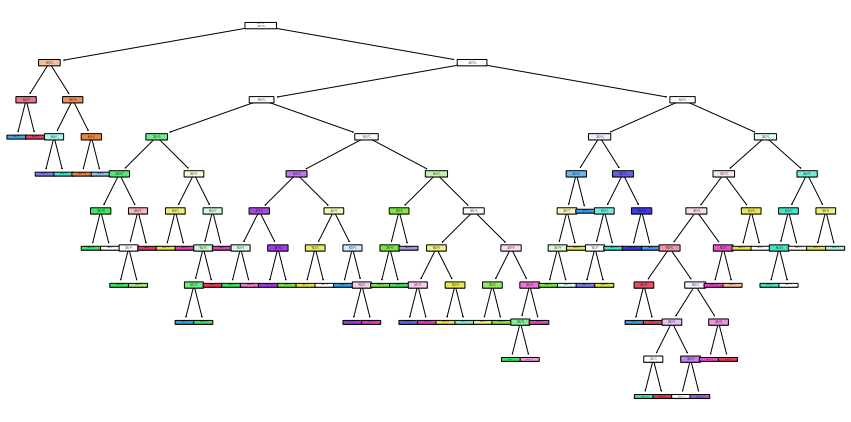

In [76]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True)
plt.show()

In [77]:
accuracy_score(clf_dt_pruned.predict(X_test), y_test)

0.8592592592592593